<a href="https://colab.research.google.com/github/SoshJam/Jove-CS3100-UofU/blob/master/For_CS3100_Fall2024/10_PDA/ASSIGNMENT-5/u1431380_asg05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asg-5 Imports


In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True

if OWN_INSTALL:

  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                   '../../../..',  '../../../../3rdparty',
                   '../../..',     '../../../3rdparty',
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.AnimatePDA import *
from jove.Def_PDA    import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

 "help(AnimatePDA)" gives you info on how to use animations with PDA 


# **To TAs:** Please note my extension for this assignment and grade accordingly, also that I wasn't able to include the animations in the PDF and had to screenshot and submit them separately.

## Question 1:

Design a PDA called "a2b" for the language $\{a^i b^j : i,j\ge 0, {\rm and}\; j = 2i \}$.
- Some strings in such language are: $abb$, $aabbbb$, $aaabbbbbb$, etc.
- Put a "header block" of comments (before you list the PDA transitions) that describes the overall stacking strategy. For example, put these comments that are accepted by Jove before your md2mc('''PDA...code begins'''):
  - !! The PDA uses the stack in THIS WAY while a's arrive
  - !! Then when b's arrive, the PDA does THIS
  - !! After b's, if $a$'s arrive, the PDA does THIS
- After that, fully document your design (line by line)
- Then, test your PDA on these strings
  1. $\varepsilon$ (accept)

  2. $abb$ (accept)

  3. $aabbbb$ (accept)

  4. $aaabbbbbb$ (accept)

  5. $ab$ (reject)

  6. $b$ (reject)

  7. $aba$ (reject)

  8. $abba$ (reject)
- Finally, add two more accepting and two more rejecting tests of your own.

- One case for animation is included below. Animate that please.

### Given test cases:

In [2]:
a2b = md2mc('''
PDA

!! Overall Algorithm:
!! ...a few more points
!! Whenever a's arrive, the PDA adds aa to the stack
!! When b's arrive, it removes a's one by one until it gets to the # which was added automatically
!! Further characters, or getting a B before any As, make it invalid.

!! Now a line-by-line description
I_S0 : a  , '' ; aa -> I_S0
I_S0 : '' , '' ; '' -> S1

S1   : b  , a  ; '' -> S1
S1   : '' , #  ; '' -> F_S2
''')

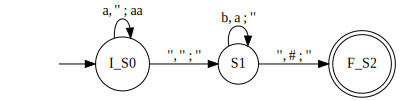

In [44]:
dotObj_pda(a2b)

In [46]:
dotObj_pda(a2b).render('a2b')

'a2b.pdf'

In [4]:
explore_pda('', a2b)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_S2', '', '')
Reached as follows:
->  ('I_S0', '', '#')
->  ('S1', '', '#')
->  ('F_S2', '', '') .


In [5]:
explore_pda('abb', a2b)

String abb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_S2', '', '')
Reached as follows:
->  ('I_S0', 'abb', '#')
->  ('I_S0', 'bb', 'aa#')
->  ('S1', 'bb', 'aa#')
->  ('S1', 'b', 'a#')
->  ('S1', '', '#')
->  ('F_S2', '', '') .


In [6]:
explore_pda('aabbbb', a2b)

String aabbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_S2', '', '')
Reached as follows:
->  ('I_S0', 'aabbbb', '#')
->  ('I_S0', 'abbbb', 'aa#')
->  ('I_S0', 'bbbb', 'aaaa#')
->  ('S1', 'bbbb', 'aaaa#')
->  ('S1', 'bbb', 'aaa#')
->  ('S1', 'bb', 'aa#')
->  ('S1', 'b', 'a#')
->  ('S1', '', '#')
->  ('F_S2', '', '') .


In [7]:
explore_pda('aaabbbbbb', a2b)

String aaabbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_S2', '', '')
Reached as follows:
->  ('I_S0', 'aaabbbbbb', '#')
->  ('I_S0', 'aabbbbbb', 'aa#')
->  ('I_S0', 'abbbbbb', 'aaaa#')
->  ('I_S0', 'bbbbbb', 'aaaaaa#')
->  ('S1', 'bbbbbb', 'aaaaaa#')
->  ('S1', 'bbbbb', 'aaaaa#')
->  ('S1', 'bbbb', 'aaaa#')
->  ('S1', 'bbb', 'aaa#')
->  ('S1', 'bb', 'aa#')
->  ('S1', 'b', 'a#')
->  ('S1', '', '#')
->  ('F_S2', '', '') .


In [8]:
# Animate just the above case

AnimatePDA(a2b, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [9]:
explore_pda('ab', a2b)

String ab rejected by your PDA :-(
Visited states are:
{('F_S2', 'ab', ''), ('S1', '', 'a#'), ('S1', 'b', 'aa#'), ('I_S0', 'b', 'aa#'), ('I_S0', 'ab', '#'), ('S1', 'ab', '#')}


In [10]:
explore_pda('b', a2b)

String b rejected by your PDA :-(
Visited states are:
{('F_S2', 'b', ''), ('I_S0', 'b', '#'), ('S1', 'b', '#')}


In [11]:
explore_pda('aba', a2b)

String aba rejected by your PDA :-(
Visited states are:
{('S1', 'aba', '#'), ('F_S2', 'aba', ''), ('S1', 'ba', 'aa#'), ('I_S0', 'aba', '#'), ('I_S0', 'ba', 'aa#'), ('S1', 'a', 'a#')}


In [12]:
explore_pda('abba', a2b)

String abba rejected by your PDA :-(
Visited states are:
{('F_S2', 'abba', ''), ('F_S2', 'a', ''), ('I_S0', 'bba', 'aa#'), ('S1', 'abba', '#'), ('I_S0', 'abba', '#'), ('S1', 'bba', 'aa#'), ('S1', 'a', '#'), ('S1', 'ba', 'a#')}


### Add your own test cases here:

In [13]:
# Passing test cases are just boring haha
explore_pda('aaaabbbbbbbb', a2b)

String aaaabbbbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_S2', '', '')
Reached as follows:
->  ('I_S0', 'aaaabbbbbbbb', '#')
->  ('I_S0', 'aaabbbbbbbb', 'aa#')
->  ('I_S0', 'aabbbbbbbb', 'aaaa#')
->  ('I_S0', 'abbbbbbbb', 'aaaaaa#')
->  ('I_S0', 'bbbbbbbb', 'aaaaaaaa#')
->  ('S1', 'bbbbbbbb', 'aaaaaaaa#')
->  ('S1', 'bbbbbbb', 'aaaaaaa#')
->  ('S1', 'bbbbbb', 'aaaaaa#')
->  ('S1', 'bbbbb', 'aaaaa#')
->  ('S1', 'bbbb', 'aaaa#')
->  ('S1', 'bbb', 'aaa#')
->  ('S1', 'bb', 'aa#')
->  ('S1', 'b', 'a#')
->  ('S1', '', '#')
->  ('F_S2', '', '') .


In [14]:
explore_pda('aaaaabbbbbbbbbb', a2b)

String aaaaabbbbbbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_S2', '', '')
Reached as follows:
->  ('I_S0', 'aaaaabbbbbbbbbb', '#')
->  ('I_S0', 'aaaabbbbbbbbbb', 'aa#')
->  ('I_S0', 'aaabbbbbbbbbb', 'aaaa#')
->  ('I_S0', 'aabbbbbbbbbb', 'aaaaaa#')
->  ('I_S0', 'abbbbbbbbbb', 'aaaaaaaa#')
->  ('I_S0', 'bbbbbbbbbb', 'aaaaaaaaaa#')
->  ('S1', 'bbbbbbbbbb', 'aaaaaaaaaa#')
->  ('S1', 'bbbbbbbbb', 'aaaaaaaaa#')
->  ('S1', 'bbbbbbbb', 'aaaaaaaa#')
->  ('S1', 'bbbbbbb', 'aaaaaaa#')
->  ('S1', 'bbbbbb', 'aaaaaa#')
->  ('S1', 'bbbbb', 'aaaaa#')
->  ('S1', 'bbbb', 'aaaa#')
->  ('S1', 'bbb', 'aaa#')
->  ('S1', 'bb', 'aa#')
->  ('S1', 'b', 'a#')
->  ('S1', '', '#')
->  ('F_S2', '', '') .


In [15]:
# Failing test cases
explore_pda('bba', a2b)

String bba rejected by your PDA :-(
Visited states are:
{('I_S0', 'bba', '#'), ('S1', 'bba', '#'), ('F_S2', 'bba', '')}


In [16]:
explore_pda('abbaabbbb', a2b)

String abbaabbbb rejected by your PDA :-(
Visited states are:
{('S1', 'bbaabbbb', 'aa#'), ('S1', 'aabbbb', '#'), ('I_S0', 'bbaabbbb', 'aa#'), ('F_S2', 'abbaabbbb', ''), ('S1', 'baabbbb', 'a#'), ('I_S0', 'abbaabbbb', '#'), ('F_S2', 'aabbbb', ''), ('S1', 'abbaabbbb', '#')}


## Question 2:

Design a PDA for language Lif in question 1.

This language comes from Section 4.8.1 of the book, but to reduce the complexity of the language, I've changed the i=3 to i=2.

Thus THIS Lif language is

  { a^i b^j c^k : if (i=2) then j=k }

This is reflected in the tests -- I accept when i=2 as you can see.

- Hint: when a = 2, the PDA matches b's and c's (using the stack for this match). Else, it only checks their order of arrival (and simply ignores the stack).
- Test your PDA on these strings:
  - aabbbccc   (accept)
  - aabbbbcccc (accept)
  - aa         (accept)
  - abbbcccc (accept)
  - aaabbc   (accept)
  - Epsilon    (accept, as there are zero a's)
  - abbcc    (accept, as there is no constraint to not match b's and c's if two a's)
  - cb        (reject)
  - aabbcca (reject)
  - abba     (reject)
  - ccac       (reject)
  - abba       (reject)
  - baac       (reject)
  - ac         (accept)
- Then add three more accepting test cases and three more rejecting test cases. Document the tests saying why they must pass/fail

* Two cases for animation have been added. Animate that please.

In [17]:
Lif = md2mc('''
PDA

!! Overall Algorithm
!! This PDA will have 2 branches, one for if i==2, and one for if i!=2.
!! First we will add 2 a's to the stack.
!! If we encounter an a, we remove from the stack, and when we run out we know we have exactly 2 a's.
!! If we encounter a b or c before that, or if we encounter further a's, go to the i!=2 branch where we just make sure a's come before b's and b's come before c's.
!! If we encounter a b with exactly 2 a's, go to the i==2 branch where we use the typical method to ensure j==k.

!! Add aa to the stack
I : '' , '' ; aa -> F_S0

!! Loop state while we wait for i>=2
!! This is accepting because if there are 0 or 1 a's it's valid
F_S0 : a , a ; '' -> F_S0  !! If there are still a's, i < 2, so remove them
F_S0 : a , # ; '' -> F_B2a !! If i > 2 loop for a's
F_S0 : b , a ; '' -> F_B2b !! If i < 2 loop for b's
F_S0 : c , a ; '' -> F_B2c !! If i < 2 loop for c's (j = 0)
F_S0 : '', # ; #  -> S_B1b !! If i = 2, start the b loop

!! Branch 1, adding b's and removing them for each C
S_B1b : b  , '' ; b  -> S_B1b !! Add a b to the stack for each b we encounter
S_B1b : '' , '' ; '' -> S_B1c !! Also branch to the C state

S_B1c : c  , b  ; '' -> S_B1c !! Remove a B for each C
S_B1c : '' , #  ; '' -> F_B1  !! Finish when we get to the bottom of the stack, further b's or c's get sent to BH

!! Branch 2, just ensuring b's and c's stay in order.
F_B2a : a  , '' ; '' -> F_B2a !! Loop a's until we get a b or c
F_B2a : '' , '' ; '' -> F_B2b

F_B2b : b  , '' ; '' -> F_B2b
F_B2b : '' , '' ; '' -> F_B2c

F_B2c : c  , '' ; '' -> F_B2c
''')

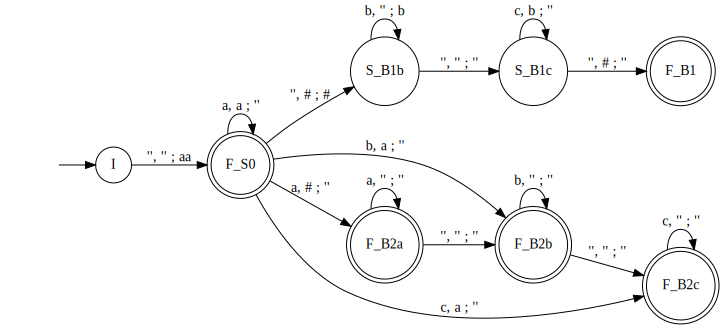

In [18]:
dotObj_pda(Lif)

In [47]:
dotObj_pda(Lif).render('Lif')

'Lif.pdf'

### Given test cases:

* aa bbb ccc   (accept)

In [19]:
explore_pda('aabbbccc', Lif)

String aabbbccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_B1', '', '')
Reached as follows:
->  ('I', 'aabbbccc', '#')
->  ('F_S0', 'aabbbccc', 'aa#')
->  ('F_S0', 'abbbccc', 'a#')
->  ('F_S0', 'bbbccc', '#')
->  ('S_B1b', 'bbbccc', '#')
->  ('S_B1b', 'bbccc', 'b#')
->  ('S_B1b', 'bccc', 'bb#')
->  ('S_B1b', 'ccc', 'bbb#')
->  ('S_B1c', 'ccc', 'bbb#')
->  ('S_B1c', 'cc', 'bb#')
->  ('S_B1c', 'c', 'b#')
->  ('S_B1c', '', '#')
->  ('F_B1', '', '') .


* aa bbbb cccc (accept)


In [20]:
# Animate the above case

AnimatePDA(Lif, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [21]:
explore_pda('aabbbbcccc', Lif)

String aabbbbcccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_B1', '', '')
Reached as follows:
->  ('I', 'aabbbbcccc', '#')
->  ('F_S0', 'aabbbbcccc', 'aa#')
->  ('F_S0', 'abbbbcccc', 'a#')
->  ('F_S0', 'bbbbcccc', '#')
->  ('S_B1b', 'bbbbcccc', '#')
->  ('S_B1b', 'bbbcccc', 'b#')
->  ('S_B1b', 'bbcccc', 'bb#')
->  ('S_B1b', 'bcccc', 'bbb#')
->  ('S_B1b', 'cccc', 'bbbb#')
->  ('S_B1c', 'cccc', 'bbbb#')
->  ('S_B1c', 'ccc', 'bbb#')
->  ('S_B1c', 'cc', 'bb#')
->  ('S_B1c', 'c', 'b#')
->  ('S_B1c', '', '#')
->  ('F_B1', '', '') .


* aa         (accept)

In [22]:
explore_pda('aa', Lif)

String aa accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F_S0', '', '#')
Reached as follows:
->  ('I', 'aa', '#')
->  ('F_S0', 'aa', 'aa#')
->  ('F_S0', 'a', 'a#')
->  ('F_S0', '', '#') .
Final state  ('F_B1', '', '')
Reached as follows:
->  ('I', 'aa', '#')
->  ('F_S0', 'aa', 'aa#')
->  ('F_S0', 'a', 'a#')
->  ('F_S0', '', '#')
->  ('S_B1b', '', '#')
->  ('S_B1c', '', '#')
->  ('F_B1', '', '') .


* a bbb cccc (accept)

In [23]:
# Animate the above case

AnimatePDA(Lif, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [24]:
explore_pda('abbbcccc', Lif)

String abbbcccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_B2c', '', '#')
Reached as follows:
->  ('I', 'abbbcccc', '#')
->  ('F_S0', 'abbbcccc', 'aa#')
->  ('F_S0', 'bbbcccc', 'a#')
->  ('F_B2b', 'bbcccc', '#')
->  ('F_B2b', 'bcccc', '#')
->  ('F_B2b', 'cccc', '#')
->  ('F_B2c', 'cccc', '#')
->  ('F_B2c', 'ccc', '#')
->  ('F_B2c', 'cc', '#')
->  ('F_B2c', 'c', '#')
->  ('F_B2c', '', '#') .


* aaa bb c   (accept)

In [25]:
explore_pda('aaabbc', Lif)

String aaabbc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_B2c', '', '')
Reached as follows:
->  ('I', 'aaabbc', '#')
->  ('F_S0', 'aaabbc', 'aa#')
->  ('F_S0', 'aabbc', 'a#')
->  ('F_S0', 'abbc', '#')
->  ('F_B2a', 'bbc', '')
->  ('F_B2b', 'bbc', '')
->  ('F_B2b', 'bc', '')
->  ('F_B2b', 'c', '')
->  ('F_B2c', 'c', '')
->  ('F_B2c', '', '') .


* Epsilon    (accept, as there are zero a's)

In [26]:
explore_pda('', Lif)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_S0', '', 'aa#')
Reached as follows:
->  ('I', '', '#')
->  ('F_S0', '', 'aa#') .


* a bb cc    (accept, as there is no constraint to not match b's and c's if two a's)

In [27]:
explore_pda('abbcc', Lif)

String abbcc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_B2c', '', '#')
Reached as follows:
->  ('I', 'abbcc', '#')
->  ('F_S0', 'abbcc', 'aa#')
->  ('F_S0', 'bbcc', 'a#')
->  ('F_B2b', 'bcc', '#')
->  ('F_B2b', 'cc', '#')
->  ('F_B2c', 'cc', '#')
->  ('F_B2c', 'c', '#')
->  ('F_B2c', '', '#') .


* b c must accept too

In [28]:
explore_pda('bc', Lif)

String bc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_B2c', '', 'a#')
Reached as follows:
->  ('I', 'bc', '#')
->  ('F_S0', 'bc', 'aa#')
->  ('F_B2b', 'c', 'a#')
->  ('F_B2c', 'c', 'a#')
->  ('F_B2c', '', 'a#') .


* c b        (reject)

In [29]:
explore_pda('cb', Lif)

String cb rejected by your PDA :-(
Visited states are:
{('F_B2c', 'b', 'a#'), ('F_S0', 'cb', 'aa#'), ('I', 'cb', '#')}


* aa bb cc a (reject)

In [30]:
explore_pda('aabbcca', Lif)

String aabbcca rejected by your PDA :-(
Visited states are:
{('F_B1', 'a', ''), ('S_B1b', 'cca', 'bb#'), ('S_B1b', 'bcca', 'b#'), ('F_B1', 'bbcca', ''), ('S_B1c', 'a', '#'), ('S_B1c', 'bbcca', '#'), ('F_S0', 'aabbcca', 'aa#'), ('S_B1c', 'bcca', 'b#'), ('S_B1b', 'bbcca', '#'), ('S_B1c', 'cca', 'bb#'), ('F_S0', 'abbcca', 'a#'), ('I', 'aabbcca', '#'), ('S_B1c', 'ca', 'b#'), ('F_S0', 'bbcca', '#')}


* a bb a     (reject)

In [31]:
explore_pda('abba', Lif)

String abba rejected by your PDA :-(
Visited states are:
{('F_B2c', 'a', '#'), ('F_S0', 'abba', 'aa#'), ('I', 'abba', '#'), ('F_B2c', 'ba', '#'), ('F_B2b', 'a', '#'), ('F_S0', 'bba', 'a#'), ('F_B2b', 'ba', '#')}


* ccac       (reject)

In [32]:
explore_pda('ccac', Lif)

String ccac rejected by your PDA :-(
Visited states are:
{('F_B2c', 'cac', 'a#'), ('I', 'ccac', '#'), ('F_S0', 'ccac', 'aa#'), ('F_B2c', 'ac', 'a#')}


* abba       (reject)

In [33]:
explore_pda('abba', Lif)

String abba rejected by your PDA :-(
Visited states are:
{('F_B2c', 'a', '#'), ('F_S0', 'abba', 'aa#'), ('I', 'abba', '#'), ('F_B2c', 'ba', '#'), ('F_B2b', 'a', '#'), ('F_S0', 'bba', 'a#'), ('F_B2b', 'ba', '#')}


* baac       (reject)

In [34]:
explore_pda('baac', Lif)

String baac rejected by your PDA :-(
Visited states are:
{('I', 'baac', '#'), ('F_B2c', 'aac', 'a#'), ('F_B2b', 'aac', 'a#'), ('F_S0', 'baac', 'aa#')}


* ac         (accept), as there are no b's  

In [35]:
explore_pda('ac', Lif)

String ac accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_B2c', '', '#')
Reached as follows:
->  ('I', 'ac', '#')
->  ('F_S0', 'ac', 'aa#')
->  ('F_S0', 'c', 'a#')
->  ('F_B2c', '', '#') .


* acb (reject)

In [36]:
explore_pda('acb', Lif)

String acb rejected by your PDA :-(
Visited states are:
{('F_B2c', 'b', '#'), ('F_S0', 'acb', 'aa#'), ('I', 'acb', '#'), ('F_S0', 'cb', 'a#')}


### Add your test cases below:

In [37]:
# Accept: j=k
explore_pda('aabbbbbccccc', Lif)

String aabbbbbccccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_B1', '', '')
Reached as follows:
->  ('I', 'aabbbbbccccc', '#')
->  ('F_S0', 'aabbbbbccccc', 'aa#')
->  ('F_S0', 'abbbbbccccc', 'a#')
->  ('F_S0', 'bbbbbccccc', '#')
->  ('S_B1b', 'bbbbbccccc', '#')
->  ('S_B1b', 'bbbbccccc', 'b#')
->  ('S_B1b', 'bbbccccc', 'bb#')
->  ('S_B1b', 'bbccccc', 'bbb#')
->  ('S_B1b', 'bccccc', 'bbbb#')
->  ('S_B1b', 'ccccc', 'bbbbb#')
->  ('S_B1c', 'ccccc', 'bbbbb#')
->  ('S_B1c', 'cccc', 'bbbb#')
->  ('S_B1c', 'ccc', 'bbb#')
->  ('S_B1c', 'cc', 'bb#')
->  ('S_B1c', 'c', 'b#')
->  ('S_B1c', '', '#')
->  ('F_B1', '', '') .


In [38]:
# Accept: i > 2
explore_pda('aaabccc', Lif)

String aaabccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_B2c', '', '')
Reached as follows:
->  ('I', 'aaabccc', '#')
->  ('F_S0', 'aaabccc', 'aa#')
->  ('F_S0', 'aabccc', 'a#')
->  ('F_S0', 'abccc', '#')
->  ('F_B2a', 'bccc', '')
->  ('F_B2b', 'bccc', '')
->  ('F_B2b', 'ccc', '')
->  ('F_B2c', 'ccc', '')
->  ('F_B2c', 'cc', '')
->  ('F_B2c', 'c', '')
->  ('F_B2c', '', '') .


In [39]:
# Accept: i > 2, j=0
explore_pda('aaaccc', Lif)

String aaaccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_B2c', '', '')
Reached as follows:
->  ('I', 'aaaccc', '#')
->  ('F_S0', 'aaaccc', 'aa#')
->  ('F_S0', 'aaccc', 'a#')
->  ('F_S0', 'accc', '#')
->  ('F_B2a', 'ccc', '')
->  ('F_B2b', 'ccc', '')
->  ('F_B2c', 'ccc', '')
->  ('F_B2c', 'cc', '')
->  ('F_B2c', 'c', '')
->  ('F_B2c', '', '') .


In [40]:
# Reject: j < k
explore_pda('aabbbcccc', Lif)

String aabbbcccc rejected by your PDA :-(
Visited states are:
{('S_B1c', 'bcccc', 'bb#'), ('S_B1b', 'bcccc', 'bb#'), ('S_B1c', 'c', '#'), ('F_B1', 'bbbcccc', ''), ('F_S0', 'aabbbcccc', 'aa#'), ('S_B1b', 'bbcccc', 'b#'), ('S_B1c', 'bbbcccc', '#'), ('I', 'aabbbcccc', '#'), ('S_B1b', 'bbbcccc', '#'), ('S_B1b', 'cccc', 'bbb#'), ('F_S0', 'bbbcccc', '#'), ('S_B1c', 'cc', 'b#'), ('S_B1c', 'cccc', 'bbb#'), ('S_B1c', 'ccc', 'bb#'), ('S_B1c', 'bbcccc', 'b#'), ('F_B1', 'c', ''), ('F_S0', 'abbbcccc', 'a#')}


In [41]:
# Reject: c's before b's despite j=k
explore_pda('aacccbbb', Lif)

String aacccbbb rejected by your PDA :-(
Visited states are:
{('S_B1b', 'cccbbb', '#'), ('F_S0', 'cccbbb', '#'), ('F_B1', 'cccbbb', ''), ('F_S0', 'aacccbbb', 'aa#'), ('S_B1c', 'cccbbb', '#'), ('F_S0', 'acccbbb', 'a#'), ('I', 'aacccbbb', '#')}


In [42]:
# Reject: j > k
explore_pda('aabbbbccc', Lif)

String aabbbbccc rejected by your PDA :-(
Visited states are:
{('S_B1c', '', 'b#'), ('F_S0', 'aabbbbccc', 'aa#'), ('S_B1c', 'bbbbccc', '#'), ('S_B1c', 'cc', 'bbb#'), ('I', 'aabbbbccc', '#'), ('S_B1c', 'c', 'bb#'), ('F_S0', 'abbbbccc', 'a#'), ('S_B1b', 'bccc', 'bbb#'), ('S_B1b', 'bbccc', 'bb#'), ('S_B1c', 'bccc', 'bbb#'), ('F_B1', 'bbbbccc', ''), ('S_B1b', 'bbbccc', 'b#'), ('S_B1c', 'bbccc', 'bb#'), ('S_B1b', 'bbbbccc', '#'), ('S_B1c', 'bbbccc', 'b#'), ('S_B1c', 'ccc', 'bbbb#'), ('F_S0', 'bbbbccc', '#'), ('S_B1b', 'ccc', 'bbbb#')}


# END
